In [50]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import requests 
import re
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import datetime
import io
import os
import seaborn as sns
import scipy as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:

df = pd.read_csv('twitter_archive_master.csv', parse_dates = ['timestamp'], dtype = {'tweet_id':str})

In [52]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,9774
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,20562,3261
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,12041,2158
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,56848,16716
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,28226,4429
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,32467,7711



# What is  the dog_breed  receives the highest average rating_numerator?

In [53]:

# Use groupby to get the mean rating for each dog breed
dog_rating_mean = df.groupby('dog_stage').rating_numerator.mean()
dog_rating_mean

dog_stage
doggo           11.888889
doggofloofer    11.000000
doggopupper     11.000000
doggopuppo      13.000000
floofer         12.000000
pupper          10.716418
puppo           12.000000
Name: rating_numerator, dtype: float64

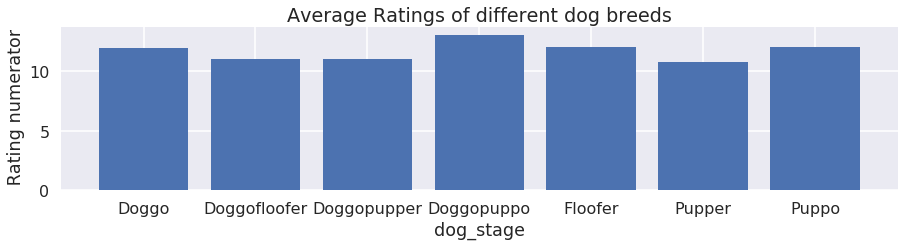

In [56]:
# Create a bar chart with proper labels
locations = [1,2,3,4,5,6,7]
heights = dog_rating_mean


labels = dog_rating_mean.index.str.replace('_', ' ').str.title() # alternative to commented out line above
plt.subplots(figsize=(15, 3))
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Ratings of different dog breeds')
plt.xlabel('dog_stage')
plt.ylabel(' Rating numerator');
plt.savefig('we_rate_dogs1.jpeg')

# What is the interaction with different dog stages?
###  Here we explore the relationship between dog breed ,  average retweet count and  average favorite counts.

In [57]:
# get mesn for favorite count of dog breed
dog_stage_fav_counts = df.groupby('dog_stage').favorite_count.mean()
dog_stage_fav_counts

dog_stage
doggo           19356.380952
doggofloofer    17169.000000
doggopupper     13219.875000
doggopuppo      47844.000000
floofer         13206.000000
pupper           7250.527363
puppo           21582.090909
Name: favorite_count, dtype: float64

In [58]:

# get mesn for favorite count of dog breed
dog_stage_retweet_counts = df.groupby('dog_stage').retweet_count.mean()
dog_stage_retweet_counts

dog_stage
doggo            7125.698413
doggofloofer     3433.000000
doggopupper      4397.250000
doggopuppo      19196.000000
floofer          4968.714286
pupper           2382.502488
puppo            6473.954545
Name: retweet_count, dtype: float64

In [59]:
# the index with stand for the x axis in plotting 
dog_stage_retweet_counts.index

Index(['doggo', 'doggofloofer', 'doggopupper', 'doggopuppo', 'floofer',
       'pupper', 'puppo'],
      dtype='object', name='dog_stage')

In [60]:
width = 0.35
ind = np.arange(len(dog_stage_retweet_counts))

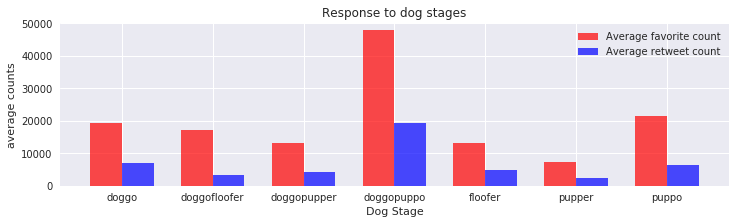

In [62]:
# plot bars
favorite_count_bars = plt.bar(ind, dog_stage_fav_counts, width, color='r', alpha=.7, label='Average favorite count')
white_bars = plt.bar(ind + width, dog_stage_retweet_counts, width, color='b', alpha=.7, label='Average retweet count')

# title and labels

plt.ylabel('average counts')
plt.xlabel('Dog Stage')
plt.title('Response to dog stages')
locations = ind + width / 2  # xtick locations
labels = dog_stage_retweet_counts.index
plt.xticks(locations, labels)
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(15,3)})
# legend
plt.legend()
plt.savefig('we_rate_dogs2.jpeg')

# Exploring the change of the public response over time

we will use the timestamp data along with the favorite count to explore the change of response over time

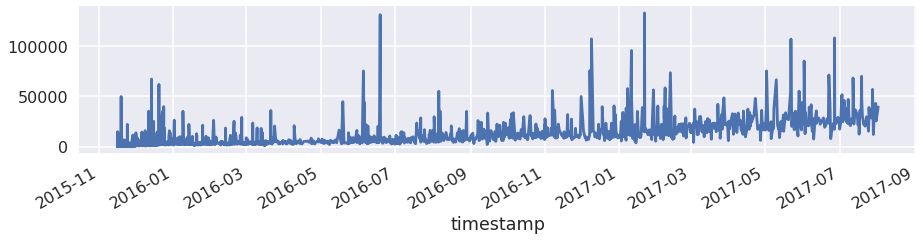

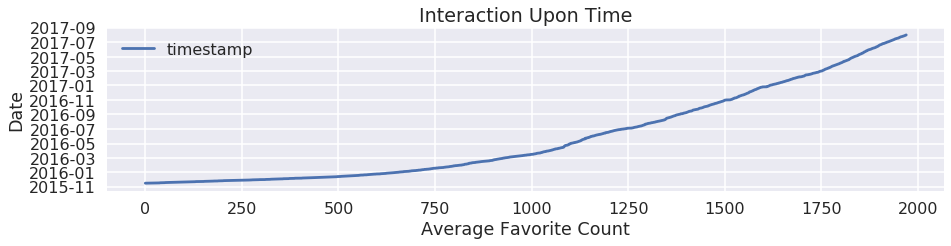

In [63]:
sns.set_context('poster')

# making a copy of our dataframe
df_timeseries = df.copy()
# set the index of the this df_timeseries to be equal to the df_timeseries["timestamp"] column.
df_timeseries.index = df_timeseries['timestamp']
# Drop the original column from the data:
df_timeseries.drop(columns=['timestamp'], inplace=True)
# Sort the index
ind = df_timeseries.sort_index(inplace=True)
# Group by the index year and month attribute and get favorite_count mean for each group
avg_favorite_count_month = df_timeseries.groupby([(df_timeseries.index)]).favorite_count.mean().plot()

# Now we create the figure and the axes

fig,axes=plt.subplots()
axes.plot(df_timeseries.index) 
plt.ylabel('Date')
plt.xlabel('Average Favorite Count')
plt.title('Interaction Upon Time')

# legend
plt.legend()
plt.savefig('we_rate_dogs3.jpeg')